# Projet ACP : Reconnaissance Faciale
![](RF.png)

## Réalisé par : 
### Achraf Aissy - Amine Imariren - Chaimaa Khalil - Oussama Teffal - Siham Hafsi

## Encadré par : 
### Pr.A.Ghazdali

# Introduction :

### En reconnaissance faciale, l'ACP peut être utilisée pour extraire des caractéristiques importantes des visages qui peuvent être utilisées pour l'identification et la classification.

### L'ACP peut également être utilisée pour réduire le nombre de dimensions des données d'images de visage, ce qui peut rendre les algorithmes de reconnaissance faciale plus efficaces et plus rapides.

# Analyse en Composantes Principales (ACP)

### L’algorithme ACP, PCA en anglais (Principal Component Analysis) et aussi connu sous le nom d’Eigenfaces puisqu’il utilise des vecteurs propres et des valeurs propres. (Respectivement Eigenvectors et Eigenvalues).
### Cet algorithme s’appuie sur des propriétés statistiques bien connues et utilise l’algèbre linéaire. Il est relativement rapide à mettre en oeuvre, Il est à la base de nombreux algorithmes globaux actuels.
### L’idée principale consiste à exprimer les M images d’apprentissage selon une base de vecteurs orthogonaux particuliers, contenant des informations indépendantes d’un vecteur à l’autre. Ces nouvelles données sont donc exprimées d’une manière plus appropriée à la reconnaissance du visage.

# Reconnaissance par Eigenfaces

### La méthode de reconnaissance faciale Eigenfaces utilise la technique de l'Analyse en Composante Principale (ACP). Cette méthode est qualifiée de globale, car tout l'ensemble du visage est analysé.

# L'import des modules nécessaires : 

In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

'''__________________________USER SELECTED AREA___________________________'''
dirNameTrain = './INPUT/TRAIN'
dirNameTest	 = './INPUT/TEST'

# La fonction qui lit les images : 

In [2]:
def ReadImages(path):
    print('Reading images from ' + path, end=' ... ', flush=True)
    # Create array of array of images.
    images = []
    # List all files in the directory and read points from text files one by one
    for filePath in sorted(os.listdir(path)):
        fileExt = os.path.splitext(filePath)[1]
        if fileExt in ['.jpg', '.jpeg', '.pgm']:
            # Add to array of images
            imagePath = os.path.join(path, filePath)
            im = cv2.imread(imagePath)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

            if im is None :
                print('image:{} not read properly'.format(imagePath))
            else :
                # Convert image to floating point
                im = np.float32(im)
                # Add image to list
                images.append(im)


    numImages = len(images)
    # Exit if no image found
    if numImages == 0 :
        print('No images found')
        sys.exit(0)

    print(str(numImages) + ' files read.')

    return images

### nous rassemblons les images de la base d’apprentissage dans une grande matrice d’images Γ où chaque colonne représente une image Γi

In [3]:
def CreateDataMatrix(images):
    print('Creating data matrix',end=' ... ', flush=True)
    
    numImages = len(images)
    sz = images[0].shape
    data = np.zeros(( sz[0] * sz[1], numImages), dtype=np.float32)
    for i in range(0, numImages):
        image = images[i].flatten()

        data[:,i] = image

    print('DONE')
    return data

![](image_vecteur.png)
![](DataMatrix.png) 

# La fonction qui calcule les valeurs propres - les vecteurs propres : 

In [4]:
def Find_Eigen(matrix) :
    eigenVectors , eigenValues , _ = np.linalg.svd(matrix, full_matrices = False )
    sort = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[sort]
    eigenVectors = eigenVectors[:,sort]
    return eigenValues,eigenVectors

# Lire les données depuis le dataset
##  Former les matrice des visages pour l'entrainement et le test : 



![](sample_Image.png)

In [5]:
# Read images
train_images = ReadImages(dirNameTrain)
print(train_images[0])
#plt.imshow(train_images[0], cmap= 'gray')
    
# Create train face matrix.
face_vector = CreateDataMatrix(train_images)
    
# Read test images
test_images = ReadImages(dirNameTest)

# Create test face matrix.
test_face_vector = CreateDataMatrix(test_images)

Reading images from ./INPUT/TRAIN ... 105 files read.
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 243. 235. 252.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
Creating data matrix ... DONE
Reading images from ./INPUT/TEST ... 30 files read.
Creating data matrix ... DONE


# L'entrainement : 

### Nous ajustons ensuite les données par rapport à la moyenne. L’image moyenne est alors soustraite de chaque image avec la formule suivante :
![](im_moy.png)

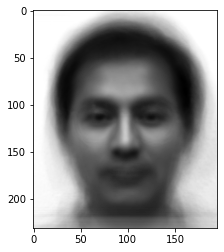

(231, 195)
105


In [6]:
from PIL import Image

average_face_vector = np.mean(face_vector, axis=1)
average_face_vector.shape = (len(average_face_vector), 1)

# average_face_image = Image.fromarray(average_face_vector)
# average_face_image.show()
plt.imshow(average_face_vector.reshape(231,195), cmap='gray')
plt.show()
    
# Size of images
sz = train_images[0].shape
print(sz)
number_train_images= face_vector.shape[1]
print(number_train_images)

#print(np.array(train_images))

# Centrer les données et calculer la matrice de covariance : 

![](cov.jpg)

In [7]:
# Subtract average_face_vector from every image vector.
sub_face_vector = np.zeros(face_vector.shape, dtype=np.float32)
sub_face_vector = face_vector - average_face_vector

# Calculate covariance matrix of above matrix -> C = A*transpose(A)
covariance_matrix = np.dot(sub_face_vector.T, sub_face_vector)
print("covariance_matrix.shape =", covariance_matrix.shape)
print(covariance_matrix)

covariance_matrix.shape = (105, 105)
[[ 1.0673395e+08  8.1968960e+07  9.6103240e+07 ... -1.8496652e+07
  -1.8047966e+07 -1.7911008e+07]
 [ 8.1968960e+07  1.1102928e+08  8.7443904e+07 ... -8.3390385e+06
  -2.4357890e+06 -9.0598960e+06]
 [ 9.6103240e+07  8.7443904e+07  1.2789400e+08 ... -2.7477528e+07
  -2.9212850e+07 -2.7631056e+07]
 ...
 [-1.8496652e+07 -8.3390385e+06 -2.7477528e+07 ...  1.9083254e+08
   1.4555168e+08  9.3259184e+07]
 [-1.8047966e+07 -2.4357890e+06 -2.9212850e+07 ...  1.4555168e+08
   1.7537309e+08  7.1434224e+07]
 [-1.7911008e+07 -9.0598960e+06 -2.7631056e+07 ...  9.3259184e+07
   7.1434224e+07  1.5209570e+08]]


# Valeurs propres - Vecteurs propres : 

Calculating PCA  ... DONE
(45045, 105)
les vecteurs propres : 
 [[ 5.7649263e-04 -4.5601328e-04 -1.3670172e-04 ...  6.9879624e-03
  -2.4477469e-03  8.1638544e-04]
 [ 5.5909518e-04 -5.2264810e-04 -1.4376802e-04 ...  7.0648273e-03
  -2.4880408e-03 -3.5679357e-03]
 [ 4.9359055e-04 -6.1070413e-04 -1.1560825e-04 ...  7.1964175e-03
  -2.3251944e-03 -5.6206104e-03]
 ...
 [ 4.2617950e-03  1.9062019e-03  2.2581944e-03 ... -3.5668020e-03
   1.7144094e-04  3.2889068e-03]
 [ 4.2618383e-03  2.2540668e-03  2.1948873e-03 ... -5.2366299e-03
   2.5737286e-03 -8.6932014e-06]
 [ 3.9516636e-03  2.4139639e-03  1.8945426e-03 ... -1.1568328e-03
   4.6171206e-03 -1.0661865e-02]]


Text(0.5, 0, 'index number')

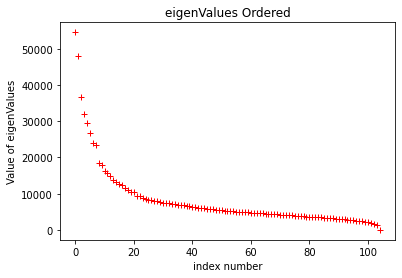

In [8]:
# Find eigenvectors and eigenvalues of above covariance matrix.
# eigenvalues arranged to match with associated eigenvector
print('Calculating PCA ', end=' ... ', flush=True)
eigenValues, eigenVectors = Find_Eigen(sub_face_vector)
print('DONE')
print(eigenVectors.shape)
print("les vecteurs propres : \n",eigenVectors)

# Plot the ordered eigen values.
plt.plot(eigenValues, 'r+')
plt.title('eigenValues Ordered')
plt.ylabel('Value of eigenValues')
plt.xlabel('index number')

### Les vecteurs propres trouvés sont ensuite, ordonnés selon leurs valeurs propres correspondantes, de manière décroissante. Plus une valeur propre est grande, plus la variance capturée par le vecteur propre est importante.

# Afficher l’image qui contient l’un de ces vecteurs propres : 

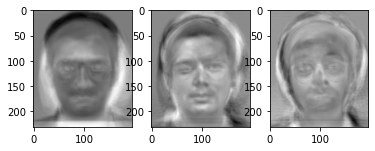

In [9]:
plt.subplot(1,3,1)
plt.imshow(eigenVectors[:,0].reshape(sz), cmap= 'gray')
plt.subplot(1,3,2)
plt.imshow(eigenVectors[:,7].reshape(sz), cmap= 'gray')
plt.subplot(1,3,3)
plt.imshow(eigenVectors[:,10].reshape(sz), cmap= 'gray')

# Calculer le poids : 
![](proj.png)

In [10]:
weights = np.dot(eigenVectors.T, sub_face_vector)
weights.shape

(105, 105)

# 

# Le test

## Réduire les dimensions des donnés du test :

In [11]:
# Find average_face_vector, sum(all image vectors)/number(images).
average_test_face_vector = test_face_vector - average_face_vector
        
#Transform the test images to 'V' space
weights_test = np.dot(eigenVectors.T, average_test_face_vector)
print(weights_test.shape)

(105, 30)


## Projeter weights_test dans l'espace géneré par eignvector :

### La projection vectorielle d’une image apprise réajustée par rapport à la moyenne Ψ est définie par :
![](proj2.png)

In [12]:
projected_fisher_faces = np.dot(weights.T, weights_test)
print(projected_fisher_faces.shape)

(105, 30)


## Enfin, on effectue une mesure de distance entre l’image test et l’image projetée sur l’espace vectoriel engendré par 𝑊𝑇. Dans notre cas on a utilisé la distance Euclidienne.


In [13]:
# Create array to keep matched images
Matched_Faces = np.zeros((weights_test.shape[1]))
    
# Compare all weights_test among the weights and Calculate Similarity
for i in range(0, weights_test.shape[1]):
    error = np.zeros((weights.shape[1]))
    for j in range (0, weights.shape[1]):
        error[j] = np.sqrt(np.sum((weights[:, j] - weights_test[:, i])**2))
            
    # Match the test image with training image 
    Matched_Faces[i] = error.argmin() // 7

# Print the indexes of matched images
print(Matched_Faces)

[ 0.  0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5. 13.  6.  7.  7.  8.  8.
  9.  9. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14.]


## On a trouvé que notre modèle est capable de prédire l’identité de 29 personnes parmi 30 personnes, $\%97$ Accuracy

# 

# Conclusion

### Les méthodes de projections peuvent être de nature linéaire ou non linéaire mais ayant un but commun. C’est la projection des données dans un nouveau sous-espace, qui élimine les éléments ne portant pas une information aidant à classifier les visages Nous avons en extension, fusionné les méthodes avec le classificateur classique : la distance euclidienne, ce système atteint un taux de reconnaissance = 97%.

# Merci de votre attention!

![](ty.jpg)